## Marko Natalia - IMAGE CLASSIFICATION

## Project Presentation, part 1

    1. Preparation of image dataset for training and validation of the model
        1.1 Data Visualization - show a few random images from:
            - the training dataset,
            - the validation dataset,
            - and the test dataset.
        1.2 Selection of additional augmentations, preparation of DataLoader for each dataset.
 
    2. Simple Convolutional Model
        2.1 Create a model - similar to TinyVGG (ideally, draw a model diagram).
        2.2 Train the model, aiming to achieve an accuracy on the test dataset above 0.7.
        2.3 Perform an analysis of the training process - display plots of the loss on the training and test datasets and accuracy on the training and test datasets.

   

### 1. Preparation of image dataset for training and validation of the model

In [5]:
pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu113
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 MB 11.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Import PyTorch
import torch
import torch.nn as nn

# Import torchvision 
import torchvision
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.3.0
torchvision version: 0.18.0


In [9]:
# Set device type
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [13]:
import os
print(os.getcwd())

/Users/nataliamarko/Downloads


In [11]:
# Set the path to the data directory
data_path = 'C:/Users/user/Documents/BIGDATALAB2023/NN and deep learning/'
image_folder_path = 'C:/Users/user/Documents/BIGDATALAB2023/NN and deep learning/data for plates model'

# Write transform for image
transform = transforms.Compose([
    transforms.CenterCrop(256),
    transforms.ToTensor()
])
# Load the datasets
train_dataset = torchvision.datasets.ImageFolder(root=image_folder_path + '/train', transform=transform)
test_dataset = torchvision.datasets.ImageFolder(root=image_folder_path + '/test', transform=transform)
valid_dataset = torchvision.datasets.ImageFolder(root=image_folder_path + '/hidden', transform=transform)

# Define a function to display a few random images from a dataset
def show_images(dataset):
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 3))
    for i in range(5):
        idx = torch.randint(len(dataset), size=(1,))
        img, label = dataset[idx]
        ax[i].imshow(img.permute(1, 2, 0))
        ax[i].axis('off')
        ax[i].set_title(f"{dataset.classes[label]} | {img.shape}")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/user/Documents/BIGDATALAB2023/NN and deep learning/data for plates model/train'

In [4]:
image_folder_path

'C:/Users/user/Documents/BIGDATALAB2023/NN and deep learning/data for plates model'

### 1.1 Data Visualization - show a few random images from:

In [5]:
# Set classes
class_names = train_dataset.classes

# # Can also get class names as a dict
# class_dict = train_dataset.class_to_idx

# Set the uotput shape
output_shape = len(class_names)

print(f'the class labels are {class_names}')
print('the output shape is', output_shape)

the class labels are ['clean', 'dirty']
the output shape is 2


In [6]:
img, label = train_dataset[0][0], train_dataset[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.2314, 0.2157, 0.1569,  ..., 0.9412, 0.5961, 0.7608],
         [0.8706, 0.3804, 0.2588,  ..., 0.5686, 0.7412, 0.8000],
         [0.8745, 0.2353, 0.6941,  ..., 0.5843, 0.5804, 0.7843],
         ...,
         [0.7647, 0.7373, 0.2627,  ..., 0.1647, 0.2392, 0.2588],
         [0.7490, 0.7608, 0.2745,  ..., 0.5843, 0.5961, 0.6314],
         [0.7686, 0.7608, 0.2275,  ..., 0.7020, 0.6235, 0.6980]],

        [[0.2392, 0.2275, 0.1686,  ..., 0.9333, 0.4706, 0.5176],
         [0.8824, 0.3961, 0.2745,  ..., 0.5529, 0.5412, 0.4745],
         [0.8941, 0.2510, 0.7137,  ..., 0.5804, 0.3686, 0.4431],
         ...,
         [0.7451, 0.7216, 0.2471,  ..., 0.1216, 0.2000, 0.2275],
         [0.7255, 0.7451, 0.2588,  ..., 0.4549, 0.4706, 0.5294],
         [0.7451, 0.7451, 0.2118,  ..., 0.5059, 0.4314, 0.5333]],

        [[0.2902, 0.2863, 0.2275,  ..., 0.9765, 0.5294, 0.5608],
         [0.9098, 0.4392, 0.3216,  ..., 0.6510, 0.6157, 0.5059],
         [0.8784, 0.2627, 0.7373,  ..., 0.71

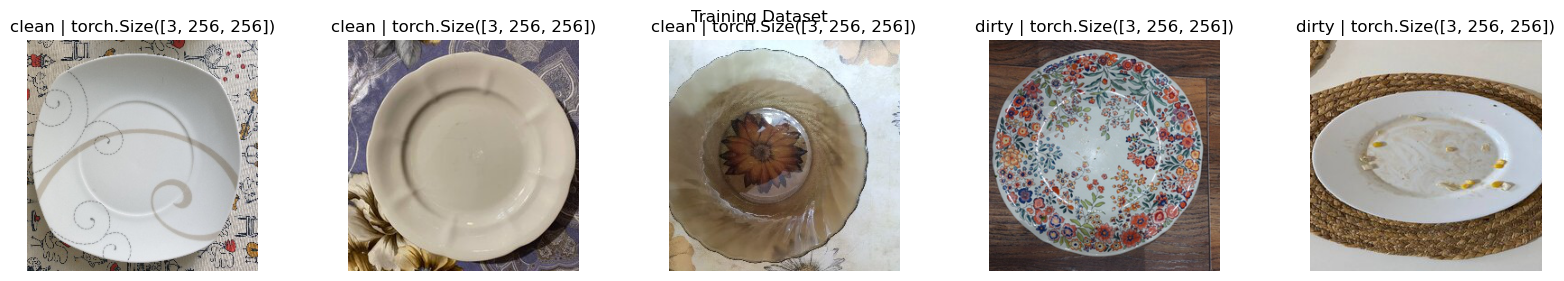

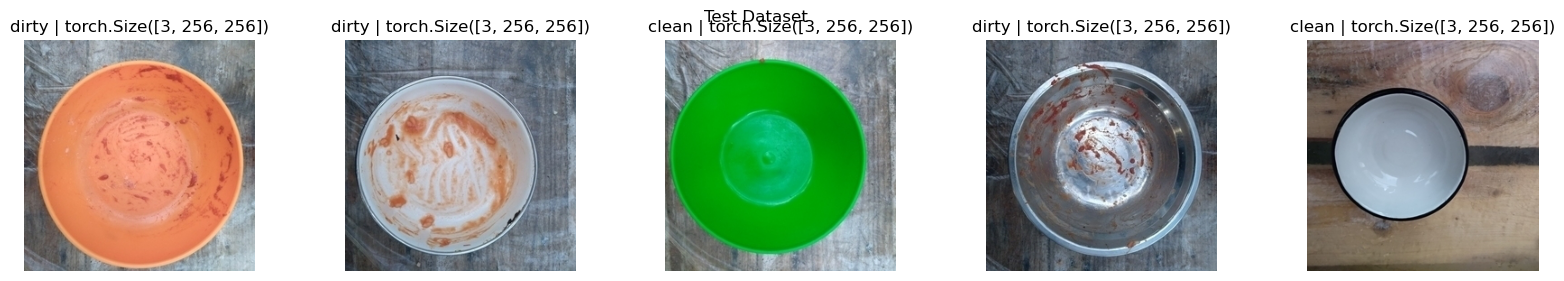

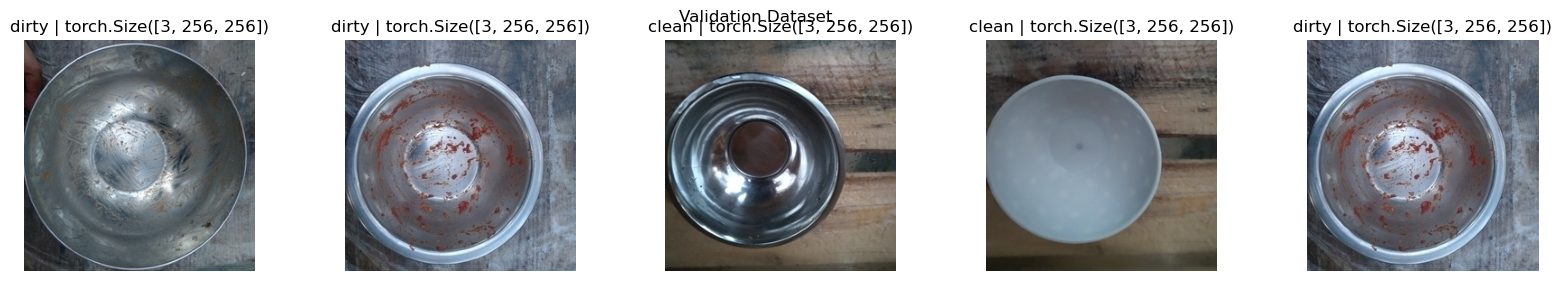

In [7]:
# Display a few random images from the training dataset
show_images(train_dataset)
plt.suptitle('Training Dataset')
plt.show()

# Display a few random images from the test dataset
show_images(test_dataset)
plt.suptitle('Test Dataset')
plt.show()

# Display a few random images from the validation dataset
show_images(valid_dataset)
plt.suptitle('Validation Dataset')
plt.show()


### 1.2 Selection of additional augmentations, preparation of DataLoader for each dataset.

In [8]:
autoaugment_policy = torchvision.transforms.AutoAugmentPolicy.IMAGENET

In [9]:
import torchvision.transforms as transforms

# Define the transformations for data augmentation for train set and for testing&validation
train_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomApply([transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3)], p=0.5),
    transforms.RandomApply([transforms.GaussianBlur(kernel_size=3)], p=0.5),
    transforms.AutoAugment(policy=torchvision.transforms.AutoAugmentPolicy.IMAGENET),  # Apply AutoAugment
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # how intense
    transforms.ToTensor()
])
 
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.CenterCrop(64),
    transforms.ToTensor()
])

In [10]:
import os
from torch.utils.data import DataLoader

# Setup batch size and number of workers 
batch_size = 32
# num_workers = os.cpu_count()//2
num_workers = 4
print(f"Creating DataLoader's with batch size {batch_size} and {num_workers} workers.")

# Load again the datasets
train_dataset = torchvision.datasets.ImageFolder(root=image_folder_path + '/train', transform=train_transform)
test_dataset = torchvision.datasets.ImageFolder(root=image_folder_path + '/test', transform=test_transform)
valid_dataset = torchvision.datasets.ImageFolder(root=image_folder_path + '/hidden', transform=test_transform)

# Define the data loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=3, drop_last=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=3, drop_last=False)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False, num_workers=3, drop_last=False)

# Let's check out what we've created
print(f"Dataloaders: {train_loader, test_loader}") 
print(f"Length of train dataloader: {len(train_loader)} batches of {batch_size}")
print(f"Length of test dataloader: {len(test_loader)} batches of {batch_size}")
print(f"Length of hidden dataloader: {len(valid_loader)} batches of {batch_size}")

Creating DataLoader's with batch size 32 and 4 workers.
Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x000002658C4DE190>, <torch.utils.data.dataloader.DataLoader object at 0x0000026583AA0D90>)
Length of train dataloader: 9 batches of 32
Length of test dataloader: 15 batches of 32
Length of hidden dataloader: 1 batches of 32


In [11]:
img, label = next(iter(train_loader))
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

img_test, label_test = next(iter(test_loader))
print(f"Image shape: {img_test.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label_test.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])
Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


### 2. Simple Convolutional Model

## We are going to create 2 models:
    - TinyVGG model as model_TinyVGG
    - ConvNet model as model_ConvNet

In [12]:
# Let's define the function for setting the seed
def set_seed(seed):
    torch.manual_seed(seed)
    if torch.cuda.is_available(): # GPU operation have separate seed
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

In [13]:
# Instatinace the class TinyVGG

class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
        return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

In [14]:
torch.manual_seed(42)

model_TinyVGG = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_dataset.classes)).to(device)
model_TinyVGG

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=2, bias=True)
  )
)

In [15]:
class ConvNet(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super(ConvNet, self).__init__()
        
        self.conv1 = nn.Conv2d(input_shape, 32, kernel_size=3, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2)
        
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2)
        
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size=2)
        
        self.flatten = nn.Flatten()
        
        self.fc1 = nn.Linear(128 * 28 * 28, hidden_units)
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)
        
        self.fc2 = nn.Linear(hidden_units, output_shape)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.maxpool1(x)
        
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.maxpool2(x)
        
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.maxpool3(x)
        
        x = x.view(x.size(0), -1)
        x = self.flatten(x)
        
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.dropout(x)
        
        x = self.fc2(x)
        
        return x
        return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion
    

In [16]:
# Create '1' edition of our plates model, as model_ConvNet, an instance of ConvNet class

torch.manual_seed(42)

model_ConvNet = ConvNet(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_dataset.classes)).to(device)
model_ConvNet

ConvNet(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=100352, out_features=10, bias=True)
  (relu4): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=10, out_features=2, bias=True)
)

In [17]:
import torchinfo
    
from torchinfo import summary

summary(model_TinyVGG, input_size=[32, 3, 64, 64]) # do a test pass through of an example input size 


Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [32, 2]                   --
├─Sequential: 1-1                        [32, 10, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 10, 64, 64]          280
│    └─ReLU: 2-2                         [32, 10, 64, 64]          --
│    └─Conv2d: 2-3                       [32, 10, 64, 64]          910
│    └─ReLU: 2-4                         [32, 10, 64, 64]          --
│    └─MaxPool2d: 2-5                    [32, 10, 32, 32]          --
├─Sequential: 1-2                        [32, 10, 16, 16]          --
│    └─Conv2d: 2-6                       [32, 10, 32, 32]          910
│    └─ReLU: 2-7                         [32, 10, 32, 32]          --
│    └─Conv2d: 2-8                       [32, 10, 32, 32]          910
│    └─ReLU: 2-9                         [32, 10, 32, 32]          --
│    └─MaxPool2d: 2-10                   [32, 10, 16, 16]          --
├─Sequentia

In [18]:
# list(plates_model.parameters())

In [19]:
# plates_model.state_dict()


#### 2.2 Train the model, aiming to achieve an accuracy on the test dataset above 0.7.

In [20]:
def train_step_TinyVGG(model: torch.nn.Module,
                       dataloader: torch.utils.data.DataLoader, 
                       loss_fn: torch.nn.Module, 
                       optimizer: torch.optim.Optimizer):
    
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def test_step_TinyVGG(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [21]:
def train_step_ConvNet(model: nn.Module, 
               dataloader: DataLoader, 
               loss_fn: nn.Module, 
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()
    
    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0
    
    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item() 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch 
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc


def test_step_ConvNet(model: nn.Module, 
              dataloader: DataLoader, 
              loss_fn: nn.Module):
    # Put model in eval mode
    model.eval() 
    
    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0
    
    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)
    
            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            
            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))
            
    # Adjust metrics to get average loss and accuracy per batch 
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc


###  Creating a `train()` function to combine `train_step()` and `test_step()`

In [22]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
    
    # 2. Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
    }
    
    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step_TinyVGG(model=model_TinyVGG,
                                           dataloader=train_loader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step_TinyVGG(model=model_TinyVGG,
                                        dataloader=test_loader,
                                        loss_fn=loss_fn)
        
        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

### Train and Evaluate Model TinyVGG

In [59]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 50

# Recreate an instance of TinyVGG
model_TinyVGG = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_dataset.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_TinyVGG.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_TinyVGG
model_TinyVGG_results = train(model=model_TinyVGG, 
                        train_dataloader=train_loader,
                        test_dataloader=test_loader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7029 | train_acc: 0.4792 | test_loss: 0.7315 | test_acc: 0.3125
Epoch: 2 | train_loss: 0.6926 | train_acc: 0.4931 | test_loss: 0.6802 | test_acc: 0.6875
Epoch: 3 | train_loss: 0.6947 | train_acc: 0.4965 | test_loss: 0.6754 | test_acc: 0.6875
Epoch: 4 | train_loss: 0.6949 | train_acc: 0.5035 | test_loss: 0.6921 | test_acc: 0.6896
Epoch: 5 | train_loss: 0.6937 | train_acc: 0.4618 | test_loss: 0.6967 | test_acc: 0.3125
Epoch: 6 | train_loss: 0.6942 | train_acc: 0.4826 | test_loss: 0.6869 | test_acc: 0.6875
Epoch: 7 | train_loss: 0.6928 | train_acc: 0.4965 | test_loss: 0.6893 | test_acc: 0.6875
Epoch: 8 | train_loss: 0.6938 | train_acc: 0.4722 | test_loss: 0.6996 | test_acc: 0.3125
Epoch: 9 | train_loss: 0.6919 | train_acc: 0.5208 | test_loss: 0.6943 | test_acc: 0.3333
Epoch: 10 | train_loss: 0.6901 | train_acc: 0.5764 | test_loss: 0.6795 | test_acc: 0.7354
Epoch: 11 | train_loss: 0.6823 | train_acc: 0.6111 | test_loss: 0.6665 | test_acc: 0.7271
Epoch: 12 | train_l

### Train and Evaluate Model ConvNet

In [60]:
# Set random seeds
torch.manual_seed(42) 
torch.cuda.manual_seed(42)

NUM_EPOCHS = 50

model_ConvNet = ConvNet(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_dataset.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_ConvNet.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_ConvNet

model_ConvNet_results = train(model=model_ConvNet, 
                        train_dataloader=train_loader,
                        test_dataloader=test_loader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.5913 | train_acc: 0.7014 | test_loss: 0.4545 | test_acc: 0.8229
Epoch: 2 | train_loss: 0.5988 | train_acc: 0.6562 | test_loss: 0.4545 | test_acc: 0.8229
Epoch: 3 | train_loss: 0.6191 | train_acc: 0.6424 | test_loss: 0.4545 | test_acc: 0.8229
Epoch: 4 | train_loss: 0.6154 | train_acc: 0.6285 | test_loss: 0.4545 | test_acc: 0.8229
Epoch: 5 | train_loss: 0.6212 | train_acc: 0.6389 | test_loss: 0.4545 | test_acc: 0.8229
Epoch: 6 | train_loss: 0.6052 | train_acc: 0.6736 | test_loss: 0.4545 | test_acc: 0.8229
Epoch: 7 | train_loss: 0.6410 | train_acc: 0.6181 | test_loss: 0.4545 | test_acc: 0.8229
Epoch: 8 | train_loss: 0.6311 | train_acc: 0.6250 | test_loss: 0.4545 | test_acc: 0.8229
Epoch: 9 | train_loss: 0.6146 | train_acc: 0.6250 | test_loss: 0.4545 | test_acc: 0.8229
Epoch: 10 | train_loss: 0.6015 | train_acc: 0.6701 | test_loss: 0.4545 | test_acc: 0.8229
Epoch: 11 | train_loss: 0.6187 | train_acc: 0.6319 | test_loss: 0.4545 | test_acc: 0.8229
Epoch: 12 | train_l

## Perform an analysis of the training process - display plots of the loss on the training and test datasets and accuracy on the training and test datasets.

### Plot the loss curves of Model TinyVGG

In [62]:
# Check the model_TinyVGG_results keys
model_TinyVGG_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [63]:
def plot_loss_curves(results: dict[str, list[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

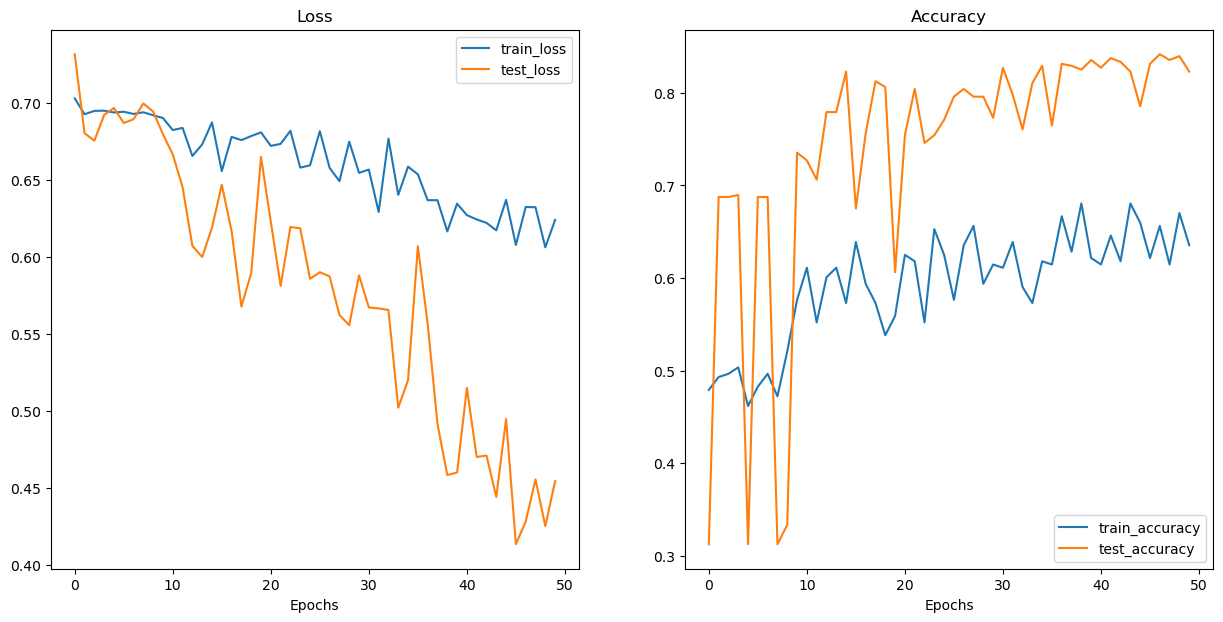

In [64]:
plot_loss_curves(model_TinyVGG_results)

### Plot the loss curves of Model 1

In [65]:
# Check the model_TinyVGG_results keys
model_ConvNet_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

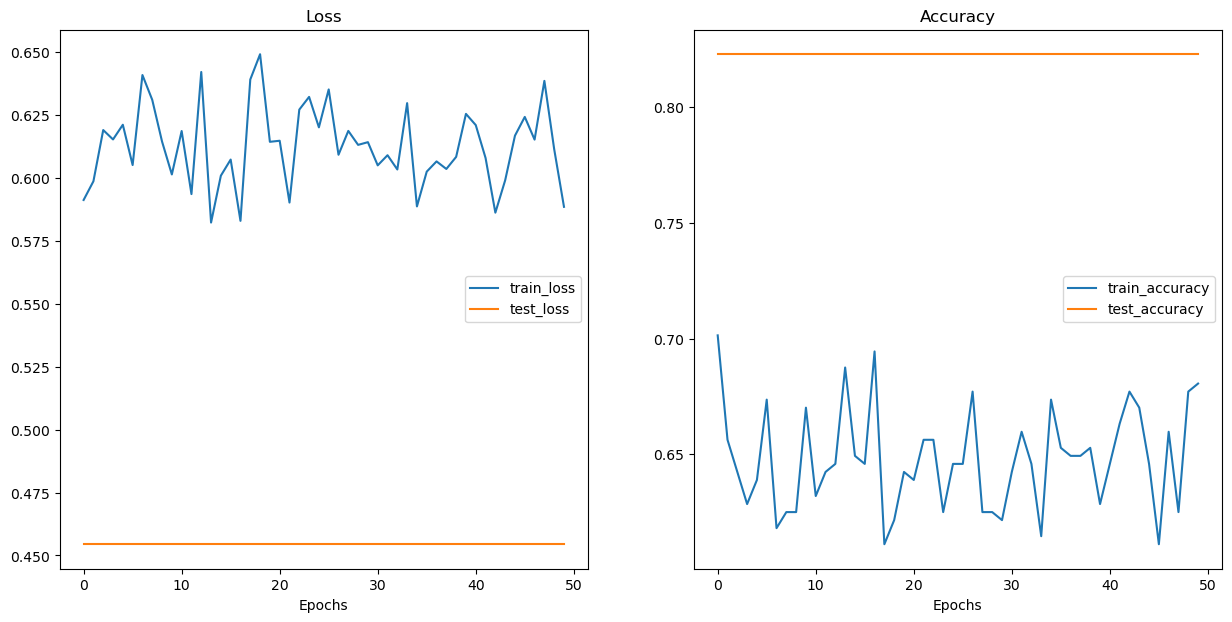

In [66]:
plot_loss_curves(model_ConvNet_results)

### What should an ideal loss curve look like?

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-loss-curves-overfitting-underfitting-ideal.jpg" alt="different training and test loss curves illustrating overfitting, underfitting and the ideal loss curves" width="800"/>

### Compare model results

In [67]:
import pandas as pd
model_TinyVGG_df = pd.DataFrame(model_TinyVGG_results)
model_ConvNet_df = pd.DataFrame(model_ConvNet_results)
print(model_TinyVGG_df)
print(model_ConvNet_df)

    train_loss  train_acc  test_loss  test_acc
0     0.702885   0.479167   0.731510  0.312500
1     0.692573   0.493056   0.680240  0.687500
2     0.694726   0.496528   0.675404  0.687500
3     0.694884   0.503472   0.692079  0.689583
4     0.693719   0.461806   0.696652  0.312500
5     0.694189   0.482639   0.686898  0.687500
6     0.692765   0.496528   0.689329  0.687500
7     0.693828   0.472222   0.699566  0.312500
8     0.691931   0.520833   0.694297  0.333333
9     0.690106   0.576389   0.679549  0.735417
10    0.682301   0.611111   0.666531  0.727083
11    0.683704   0.552083   0.645315  0.706250
12    0.665498   0.600694   0.607156  0.779167
13    0.672990   0.611111   0.599960  0.779167
14    0.687302   0.572917   0.618942  0.822917
15    0.655700   0.638889   0.646811  0.675000
16    0.677891   0.593750   0.616738  0.756250
17    0.675779   0.572917   0.567780  0.812500
18    0.678413   0.538194   0.589518  0.806250
19    0.680802   0.559028   0.664837  0.606250
20    0.67204

And now we can write some plotting code using `matplotlib` to visualize the results of `model_TinyVGG` and `model_ConvNet


` together.

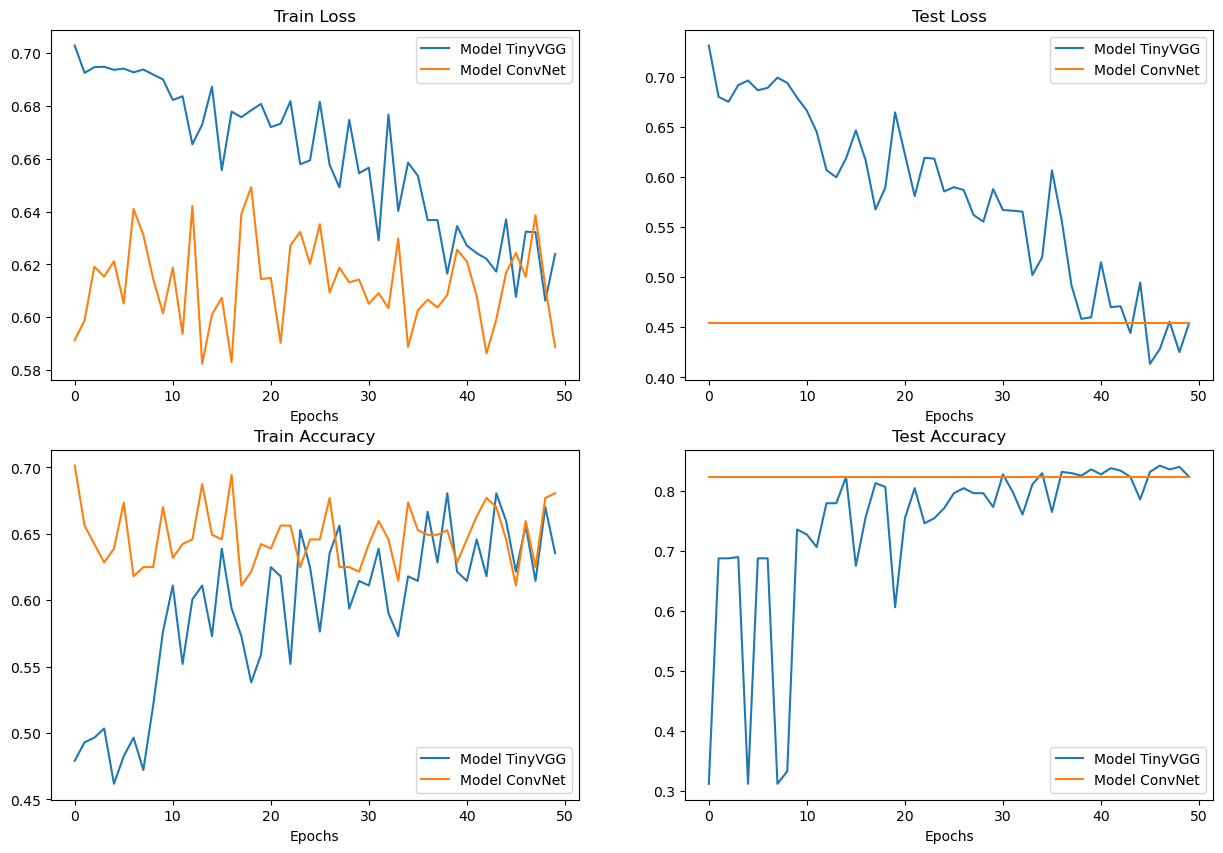

In [68]:
# Setup a plot 
plt.figure(figsize=(15, 10))

# Get number of epochs
epochs = range(len(model_TinyVGG_df))

# Plot train loss
plt.subplot(2, 2, 1)
plt.plot(epochs, model_TinyVGG_df["train_loss"], label="Model TinyVGG")
plt.plot(epochs, model_ConvNet_df["train_loss"], label="Model ConvNet")
plt.title("Train Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot test loss
plt.subplot(2, 2, 2)
plt.plot(epochs, model_TinyVGG_df["test_loss"], label="Model TinyVGG")
plt.plot(epochs, model_ConvNet_df["test_loss"], label="Model ConvNet")
plt.title("Test Loss")
plt.xlabel("Epochs")
plt.legend()

# Plot train accuracy
plt.subplot(2, 2, 3)
plt.plot(epochs, model_TinyVGG_df["train_acc"], label="Model TinyVGG")
plt.plot(epochs, model_ConvNet_df["train_acc"], label="Model ConvNet")
plt.title("Train Accuracy")
plt.xlabel("Epochs")
plt.legend()

# Plot test accuracy
plt.subplot(2, 2, 4)
plt.plot(epochs, model_TinyVGG_df["test_acc"], label="Model TinyVGG")
plt.plot(epochs, model_ConvNet_df["test_acc"], label="Model ConvNet")
plt.title("Test Accuracy")
plt.xlabel("Epochs")

plt.legend();

In [69]:
from pathlib import Path

# Create the model directory
model_TinyVGG_path = Path('models_TinyVGG')
model_TinyVGG_path.mkdir(parents=True, exist_ok=True)

# Define the model name and save path
model_name_TinyVGG = "Marko_NN_model_TinyVGG.pt"
model_TinyVGG_save_path = model_TinyVGG_path / model_name_TinyVGG

# Save the model's state dictionary
print(f"Saving model TinyVGG to: {model_TinyVGG_save_path}")
torch.save(obj=model_TinyVGG.state_dict(), f=model_TinyVGG_save_path)


Saving model TinyVGG to: models_TinyVGG\Marko_NN_model_TinyVGG.pt


In [70]:
from pathlib import Path

# Create the model directory
model_ConvNet_path = Path('models_ConvNet')
model_ConvNet_path.mkdir(parents=True, exist_ok=True)

# Define the model name and save path
model_name_ConvNet = "Marko_NN_model_ConvNet.pt"
model_ConvNet_save_path = model_ConvNet_path / model_name_ConvNet

# Save the model's state dictionary
print(f"Saving model ConvNet to: {model_ConvNet_save_path}")
torch.save(obj=model_ConvNet.state_dict(), f=model_ConvNet_save_path)

Saving model ConvNet to: models_ConvNet\Marko_NN_model_ConvNet.pt


### Now, we could load our models 

In [37]:
from pathlib import Path

# Define the model directory and file path
model_TinyVGG_path = Path('models_TinyVGG')
model_name_TinyVGG = "Marko_NN_model_TinyVGG.pt"
model_TinyVGG_load_path = model_TinyVGG_path / model_name_TinyVGG

# Load the model state dictionary
model_TinyVGG.load_state_dict(torch.load(model_TinyVGG_load_path))


<All keys matched successfully>

In [38]:
# 1. Load the saved model's state dictionary
model_ConvNet_path = Path('models_ConvNet')
model_name_ConvNet = "Marko_NN_model_ConvNet.ptf"
model_ConvNet_save_path = model_ConvNet_path / model_name_ConvNet
state_dict = torch.load(model_ConvNet_save_path)

# 2. Load the state dictionary into the model
model_ConvNet.load_state_dict(torch.load(model_ConvNet_load_path))

### THANKS FOR YOUR ATTENTION!